In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

# ============ Make synthetic data ============
noise_factor = 0.5

np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 + 4*X + noise_factor * np.random.rand(100,1)

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

# ============= Linear Regression ===============
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

print("Simple Linear Regression")
print(f"Mean squared error: {mean_squared_error(y_true = y_test, y_pred = y_pred_lin)}")
print(f"R2 value: {r2_score(y_true = y_test, y_pred = y_pred_lin)}")

# =============== Bayesian Regression ===============
baye_model = BayesianRidge()
baye_model.fit(X_train, y_train)

y_pred_baye = baye_model.predict(X_test)

# =============== Lasso (L1) Regression ==============
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

print("Lasso Regression")
print(f"Mean squared error: {mean_squared_error(y_true = y_test, y_pred = y_pred_lasso)}")
print(f"R2 value: {r2_score(y_true = y_test, y_pred = y_pred_lasso)}")

# =============== Ridge (L2) Regression ==============
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression")
print(f"Mean squared error: {mean_squared_error(y_true = y_test, y_pred = y_pred_ridge)}")
print(f"R2 value: {r2_score(y_true = y_test, y_pred = y_pred_ridge)}")

# ============== Elastic Net Regression + Grid Search ==============
elastic = ElasticNet()

param_grid = {
    'alpha': np.linspace(0, 1, 10),
    'l1_ratio': np.linspace(0, 1, 10)
}

elastic_model = GridSearchCV(
    estimator = elastic,
    param_grid=param_grid,
    scoring='r2',
    cv=5
)

elastic_model.fit(X_train, y_train)

Simple Linear Regression
Mean squared error: 0.023860758674397388
R2 value: 0.9853142672312827
Lasso Regression
Mean squared error: 1.6253801445610059
R2 value: -0.0003830463368472703
Ridge Regression
Mean squared error: 0.05513600326561774
R2 value: 0.9660650936986841


/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BINF-5507-Assignment-2/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BINF-5507-Assignment-2/.pixi/envs/default/lib/python3.13/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BINF-5507-Assignment-2/.pixi/envs/default/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/nguyennguyen/

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='r2')

Simple Polynomial Regression
Mean squared error: 0.39265770884714757
R2 value: 0.9303039624053939


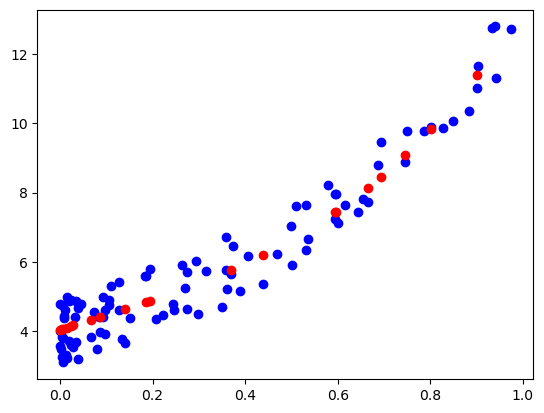

/Users/nguyennguyen/Documents/Clinical Bioinfo/MLAI/BINF-5507-Assignment-2/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


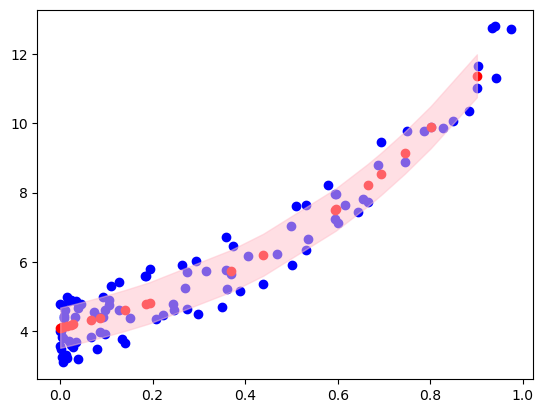

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

# ============ Make synthetic data ============
noise_factor = 0.5

np.random.seed(42)
X = np.random.rand(100, 1)**2
y = 3 + 4*X + X**2 + 4 * X**3 + 2 * np.random.rand(100, 1)

poly_features = PolynomialFeatures(degree = 3, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, train_size = 0.8, random_state=42)

# ============= Linear Regression ===============
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

print("Simple Polynomial Regression")
print(f"Mean squared error: {mean_squared_error(y_true = y_test, y_pred = y_pred_poly)}")
print(f"R2 value: {r2_score(y_true = y_test, y_pred = y_pred_poly)}")


plt.scatter(X[:, 0], y, color = 'blue')
plt.scatter(X_test[:, 0], y_pred_poly, color = 'red')
plt.legend
plt.show()

# =============== Bayesian Regression ===============
poly_baye_model = BayesianRidge()
poly_baye_model.fit(X_train, y_train)

y_predict_polybaye, y_std = poly_baye_model.predict(X_test, return_std=True)


sorted_idx = np.argsort(X_test[:, 0])
X_sorted = X_test[sorted_idx][:, 0]  # Get 1D array of x-values
y_mean_sorted = y_predict_polybaye[sorted_idx].flatten()
y_std_sorted = y_std[sorted_idx].flatten()


plt.scatter(X[:, 0], y, color = 'blue')
plt.scatter(X_test[:, 0], y_predict_polybaye, color = 'red')
plt.fill_between(X_sorted.squeeze(), 
                 y_mean_sorted - y_std_sorted, 
                 y_mean_sorted + y_std_sorted,
                 color='pink', alpha=0.5, label='Uncertainty (±1 std)')
plt.show()


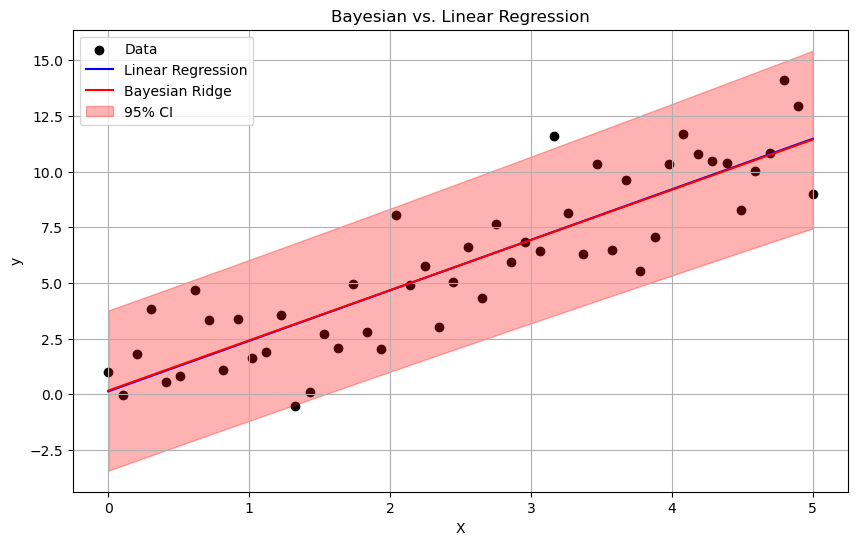

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, BayesianRidge

# 1. Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 5, 50).reshape(-1, 1)
true_slope = 2.5
y_true = true_slope * X.ravel()
noise = np.random.normal(scale=2.0, size=X.shape[0])
y = y_true + noise

# 2. Fit models
lin_reg = LinearRegression().fit(X, y)
bayes_reg = BayesianRidge().fit(X, y)

# 3. Predictions
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred_lr = lin_reg.predict(X_test)
y_pred_br, y_std_br = bayes_reg.predict(X_test, return_std=True)  # Predictive mean + uncertainty
ci_upper = y_pred_br + 1.96 * y_std_br
ci_lower = y_pred_br - 1.96 * y_std_br
# 4. Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_test, y_pred_lr, color='blue', label='Linear Regression')
plt.plot(X_test, y_pred_br, color='red', label='Bayesian Ridge')
plt.fill_between(X_test.ravel(), ci_lower, ci_upper, color='red', alpha=0.3, label='95% CI')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Bayesian vs. Linear Regression")
plt.legend()
plt.grid(True)
plt.show()